<a href="https://colab.research.google.com/github/pfaendler/ETH_SysBio_Exercises/blob/main/SysBioExercise_ROC_PR_curves_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) ROC and PR curves - Introduction
Developments in machine learning have enabled biologists to build models for various classification tasks (e.g. WT mouse vs. KO mouse). In this exercise we are going to learn how to assess the perfomance of a model (how good or how bad it is) using different metrics including "Receiver Operating Characteristic" (ROC) or "Precision Recall" (PR) curves. 

To do so, we first need to define some terms, which will help us to understand these details behind these metrics.

Commonly, we would like to predict to which class a sample belongs to with our model. This will result in 4 different possibilities:

 - **True Positives (TP)** - both actual value and prediction are 'true' (e.g. WT mouse predicted to be WT)
 - **False Positives (FP)** - actual value is 'false' and prediction is 'true' (e.g. KO mouse predicted to be WT)
 - **False Negatives (FN)** - actual value is 'true' and prediction is 'false' (e.g. WT mouse predicted to be KO)
 - **True Negatives (TN)** - both actual value and prediction are 'false' (e.g. KO mouse predicted to be KO)

These resulting values can be visualised in a so-called 'confusion matrix':


<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Basic-Confusion-matrix.png' width=300px><br> 
<em>**Figure 1:** Schematic confusion matrix <br> (copied from https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/) </em>

And from here, different metrics can be calculated:

 - **Specificity** = $TN \over TN + FP $
 - **Precision** = $TP \over TP + FP $
 - **False Positive Rate** = $FP \over TN + FP $ = 1 - Specificity 
 - **True Positive Rate = Sensitivity = Recall** = $TP \over TP + FN $

These metrics are the baseline for ROC and PR curves, which help us to display the performance of a model in a graphical way.


# 2) Example - Covid-19 Saliva Test
Let's look at these different metrics in an easier example. Suppose you have developed a COVID-19 test that can be used to detect the presence of the virus in a patient's saliva sample. Your test gives a numerical score ranging from 0 to 100, with higher scores indicating an increased chance of being COVID-19 positive. You want to evaluate the performance of your test using different metrics. 

For the purpose of this example, we will create the data ourselves. 



In [1]:
# we first need to import some python modules 
import numpy as np #for matrix manipulations 
import matplotlib.pyplot as plt # for plotting
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve # to display different metrics & curves
import seaborn as sns # for density plots

# Simulate a COVID-19 test dataset with 5000 patients, of which 100 are covid positive.
np.random.seed(0) #for reproducibility
n_patients = 5000
n_covid_pos = 100
n_covid_neg = n_patients - n_covid_pos

# We create our saliva test results by drawing from two different normal distributions using different means for each group. 
# This means, on average, the scores of covid pos. are higher, but the two distributions overlap.
covid_pos_scores = np.random.normal(loc=60, scale=10, size=n_covid_pos)
covid_neg_scores = np.random.normal(loc=40, scale=10, size=n_covid_neg)

# Combine the saliva test results in 'test_scores' and save the true label (in both np.arrays the first 100 are the positive ones)
test_scores = np.concatenate((covid_pos_scores, covid_neg_scores))
true_labels = np.concatenate((np.ones(n_covid_pos), np.zeros(n_covid_neg)))



Let's show the overlap of the two distributions:

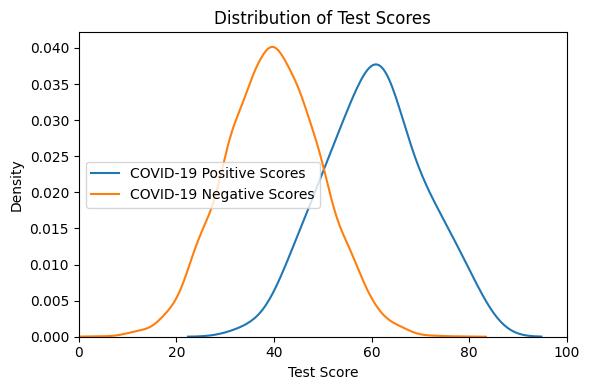

In [2]:
plt.figure(figsize=(6, 4))
sns.kdeplot(covid_pos_scores,  label='COVID-19 Positive Scores')
sns.kdeplot(covid_neg_scores,  label='COVID-19 Negative Scores')
plt.xlabel('Test Score')
plt.xlim([0, 100])
plt.ylabel('Density')
plt.title('Distribution of Test Scores')
plt.legend()

plt.tight_layout()
plt.show()

**Question**: What do you think would be a good threshold here? And can you visualise it on the plot?

In [ ]:
## your code here

Now use this thresehold and calculate the different metrics!

In [ ]:
# Similar to the 'true_labels' create the 'test_labels' based on your threshold
test_labels = test_scores>...

# Calculate the four different values introduced in 1.1, the first one shows you how you can do this in python
tp = np.sum((true_labels ==1) & (test_labels ==True))
fp = ...
tn = ...
fn = ...

print(tp, fp, tn, fn)

# We can also visualise this in a confusion matrix as introduced above.
confusion_matrix = metrics.confusion_matrix(true_labels, test_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


# Calculate the different metrics introduced in chapter 1.1 based on your threshold
precision = tp/(tp+fp)
print(precision)
specificity = ...
print(specificity)
recall = ...
print(recall)
false_pos_rate = ...
print(false_pos_rate)

## Questions
**Question:** What do these values mean for our saliva test with a threshold of 50? (Answer this question from a precision and recall perspective)

**Answer:**

**Question:** At this threshold our test does not work very well, it gives quite a high number of false positives. But what would we want from our test?


**Answer:**

# 3) ROC curve

Instead of setting the threshold manually, we can also look how this binary classification for our test works across thresholds. To do this, we can use a ROC curve.
A ROC curve is a graphical representation of the performance of a binary classifier across different thresholds and is based on the false positive rate (FPR) on the x-axis and the true positive rate (TPR) on the y-axis.

<img src='https://upload.wikimedia.org/wikipedia/commons/1/13/Roc_curve.svg' width=500px><br> 
<em>**Figure 2:** Schematic ROC curve <br> (copied from https://commons.wikimedia.org/wiki/File:Roc_curve.svg) </em>2


As you can see, a perfect classifier would have a ROC curve that passes through the top left corner of the graph, whereas a random classifier would have a ROC curve that goes diagonally from the bottom left to the top right.
In reality, these curves are often somewhere in between the two extremes.


ROC curves can also be described in a quantiative way, which is commonly referred to as the respective ROC curve's 'Area Under Curve' (AUC, also known as AUROC, area under receiver operating characteristic) value. While a perfect classifier would have an AUC of 1, a random classifier would have a value of 0.5. 


Let us revisit our previous example from a ROC curve perspective:


In [ ]:
# using the function 'roc_curve' from sklearn.metrics we can retrieve the fpr, tpr, etc. from our example
fpr, tpr, thresholds = roc_curve(true_labels, test_scores)
# we can also calculate the auc
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',label = 'Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for COVID-19 Test')
plt.legend(loc="lower right")
plt.show()

**Question:** Would you consider our saliva test to perform well in this binary classification?

**Answer:**

**Question:** Can you display, where on the curve our previously used threshold lies?

In [ ]:
# With the next line of code we can find the threshold
idx = np.argmin(np.abs(fpr - false_pos_rate))

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Random classifier')
plt.scatter() # use this function to add the threshold to the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for COVID-19 Test')
plt.legend(loc="lower right")

plt.show()

## Questions

1) Where would you draw a threshold for our test?\
2) According to the ROC curve's AUC the saliva test performs quite well, what do you think about it if you look at the confusion matrix? Can you explain why the AUC is that high?

## Answers:

# 4) PR curves

Another graphical representation to check the performance of a binary classifier is the PR (precision-recall) curve. In a PR curve, the x-axis represents the recall or sensitivity, which is the proportion of true positives (instances correctly classified as positive) out of all the actual positives in the dataset. The y-axis represents the precision or positive predictive value (PPV), which is the proportion of true positives out of all the instances classified as positive by the classifier. The PR curve summarises the trade-off between precision and recall for different classification thresholds.

Let's revisit our Covid-19 saliva test with PR curves.

In [ ]:
# Calculate the precision and recall for different discrimination thresholds
precision, recall, thresholds = precision_recall_curve(true_labels, test_scores)
pr_auc = auc(recall, precision)

# Plot the PR curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve for COVID-19 Test')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

## Questions
1) Why is the score of the PR curve so low? \
2) When do you think is a PR curve more appropriate?

## Answers:

# 5) How does this look like for different tests?

In the last part of this exercise, we want you to analyse a similarly synthetic dataset. This one is based on 500 patients that were selected for a comparison of different tests. Therefore, the study selected 250 cases that were positive and 250 cases that were not infected. 

The next code cell generates the dataset.

In [ ]:
# Generate sample data
np.random.seed(42)
n_samples = 500

# Test 1 
test1_pos_scores = np.random.normal(loc=18, scale=1, size=n_samples)
test1_neg_scores = np.random.normal(loc=28, scale=5, size=n_samples)
test1_scores = np.concatenate([test1_pos_scores,test1_neg_scores])
test1_labels = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])

# Test 2 
test2_pos_scores = np.random.normal(loc=22, scale=1, size=n_samples)
test2_neg_scores = np.random.normal(loc=28, scale=5, size=n_samples)
test2_scores = np.concatenate([test2_pos_scores,test2_neg_scores])
test2_labels = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])

# Test 3 
test3_pos_scores = np.random.normal(loc=24, scale=1, size=n_samples)
test3_neg_scores = np.random.normal(loc=28, scale=3, size=n_samples)
test3_scores = np.concatenate([test3_pos_scores,test3_neg_scores])
test3_labels = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])

# Test 4 
test4_pos_scores = np.random.normal(loc=24, scale=1, size=n_samples)
test4_neg_scores = np.random.normal(loc=28, scale=5, size=n_samples)
test4_scores = np.concatenate([test4_pos_scores,test4_neg_scores])
test4_labels = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])

# Test 5 
test5_pos_scores = np.random.normal(loc=22, scale=1, size=n_samples)
test5_neg_scores = np.random.normal(loc=26, scale=5, size=n_samples)
test5_scores = np.concatenate([test5_pos_scores,test5_neg_scores])
test5_labels = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])

# Test 6 
test6_pos_scores = np.random.normal(loc=20, scale=1, size=n_samples)
test6_neg_scores = np.random.normal(loc=25, scale=6, size=n_samples)
test6_scores = np.concatenate([test6_pos_scores,test6_neg_scores])
test6_labels = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])


# Compute ROC curve and AUC for each test
tests_scores = [test1_scores, test2_scores, test3_scores, test4_scores, test5_scores, test6_scores]
tests_labels = [test1_labels, test2_labels, test3_labels, test4_labels, test5_labels, test6_labels]
labels = ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'Test 6']

Can you display the ROC and PR curves of all of them in one plot each? (hint: use a for loop)

In [ ]:
# your code here:


## Questions:
1) What is different in terms of the first part of this exercise, and how does this translate to the ROC and PR curves?

2) Given the performance of these different tests for detection of Covid-19, how would you make a decision on which test to choose? Consider Test 1, which has the best performance but is the most expensive, and Tests 2 and 3, which perform well but are less expensive. What factors would you consider, and what trade-offs would you make?

## Answers:
